In [32]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np

import yfinance as yf
from arch import arch_model

In [33]:
# 시각화 관련 ##
import plotly_express as px
import plotly.figure_factory as ff
import cufflinks as cf
cf.go_offline(connected=True)
## cf.getThemes()
cf.set_config_file(theme='polar')
import plotly.graph_objects as go

import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
## plt.style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (10,6)

In [34]:
##절대경로 참조
import sys, os
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('__file__'))))

from library.quant_functions import anal_funcs, data_funcs

In [37]:
# Retrieve historical volatility data
volatility_data = data_funcs.get_merged_df('^IXIC', '^GSPC')

[*********************100%***********************]  2 of 2 completed


In [38]:
ticker = '^IXIC'

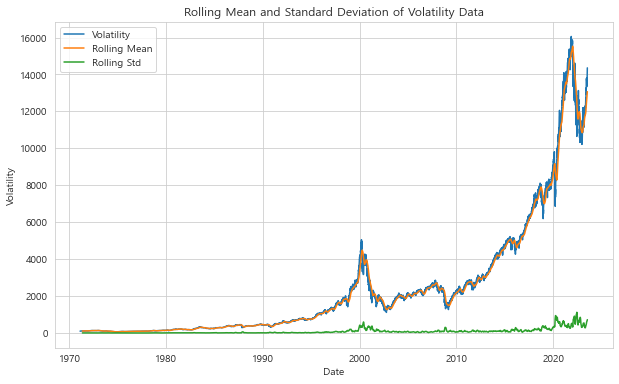

In [39]:
# Calculate the rolling mean and standard deviation
rolling_mean = volatility_data[ticker].rolling(window=60).mean()
rolling_std = volatility_data[ticker].rolling(window=60).std()
# Plot the rolling mean and standard deviation
plt.figure(figsize=(10, 6))
plt.plot(volatility_data.index, volatility_data[ticker], label="Volatility")
plt.plot(rolling_mean.index, rolling_mean, label="Rolling Mean")
plt.plot(rolling_std.index, rolling_std, label="Rolling Std")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Rolling Mean and Standard Deviation of Volatility Data")
plt.legend()
plt.grid(True)

plt.show()

In [40]:
# Calculate log returns
returns = np.log(volatility_data[ticker]).diff().dropna()
# Fit the GARCH(1, 1) model
model = arch_model(returns, vol="Garch", p=1, q=1)
results = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8.943582310037464e+23
Iteration:      2,   Func. Count:     21,   Neg. LLF: 2.804909228875184e+18
Optimization terminated successfully    (Exit mode 0)
            Current function value: -42569.244146488054
            Iterations: 3
            Function evaluations: 30
            Gradient evaluations: 2


In [41]:
# Estimate the volatility
volatility = results.conditional_volatility

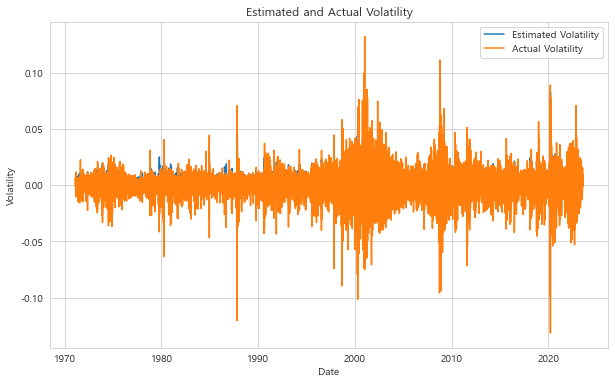

In [42]:
# Plot the estimated and actual volatility
plt.figure(figsize=(10, 6))
plt.plot(volatility.index, volatility, label="Estimated Volatility")
plt.plot(returns.index, returns, label="Actual Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Estimated and Actual Volatility")
plt.legend()
plt.grid(True)

plt.show()

<AxesSubplot:xlabel='Date'>

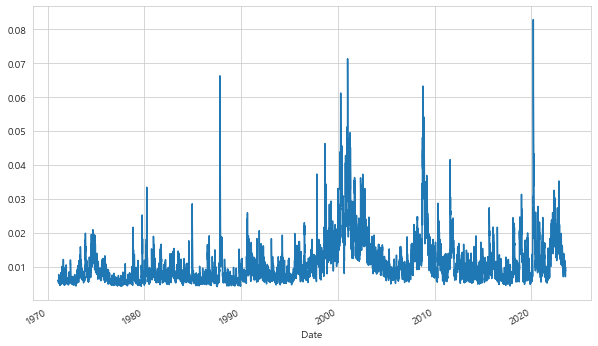

In [43]:
volatility.plot()

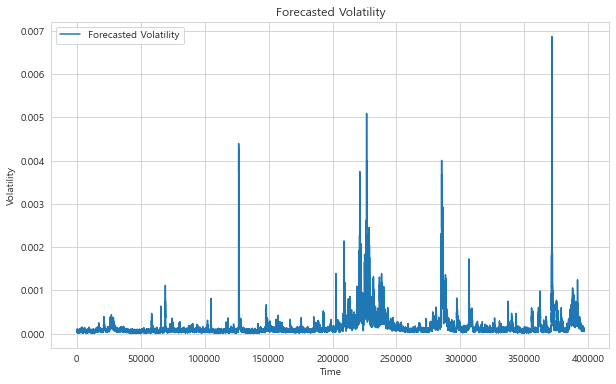

In [44]:
# Forecast the volatility
forecast = results.forecast(start=0, horizon=30)
forecast_volatility = forecast.variance.dropna().values.flatten()

# Plot the forecasted volatility
plt.figure(figsize=(10, 6))
plt.plot(forecast_volatility, label="Forecasted Volatility")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.title("Forecasted Volatility")
plt.legend()
plt.grid(True)

plt.show()
## 그냥 과거 복제네..

In [45]:
# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(volatility - returns))
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((volatility - returns) ** 2))
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.012010182725187514
Root Mean Squared Error (RMSE): 0.017793037155737688


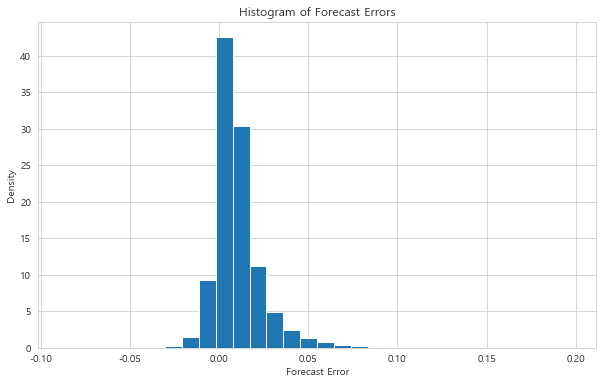

In [46]:
# Calculate the forecast errors
errors = volatility - returns

# Plot the histogram of forecast errors
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, density=True)
plt.xlabel("Forecast Error")
plt.ylabel("Density")
plt.title("Histogram of Forecast Errors")
plt.grid(True)

plt.show()